### Enfoque

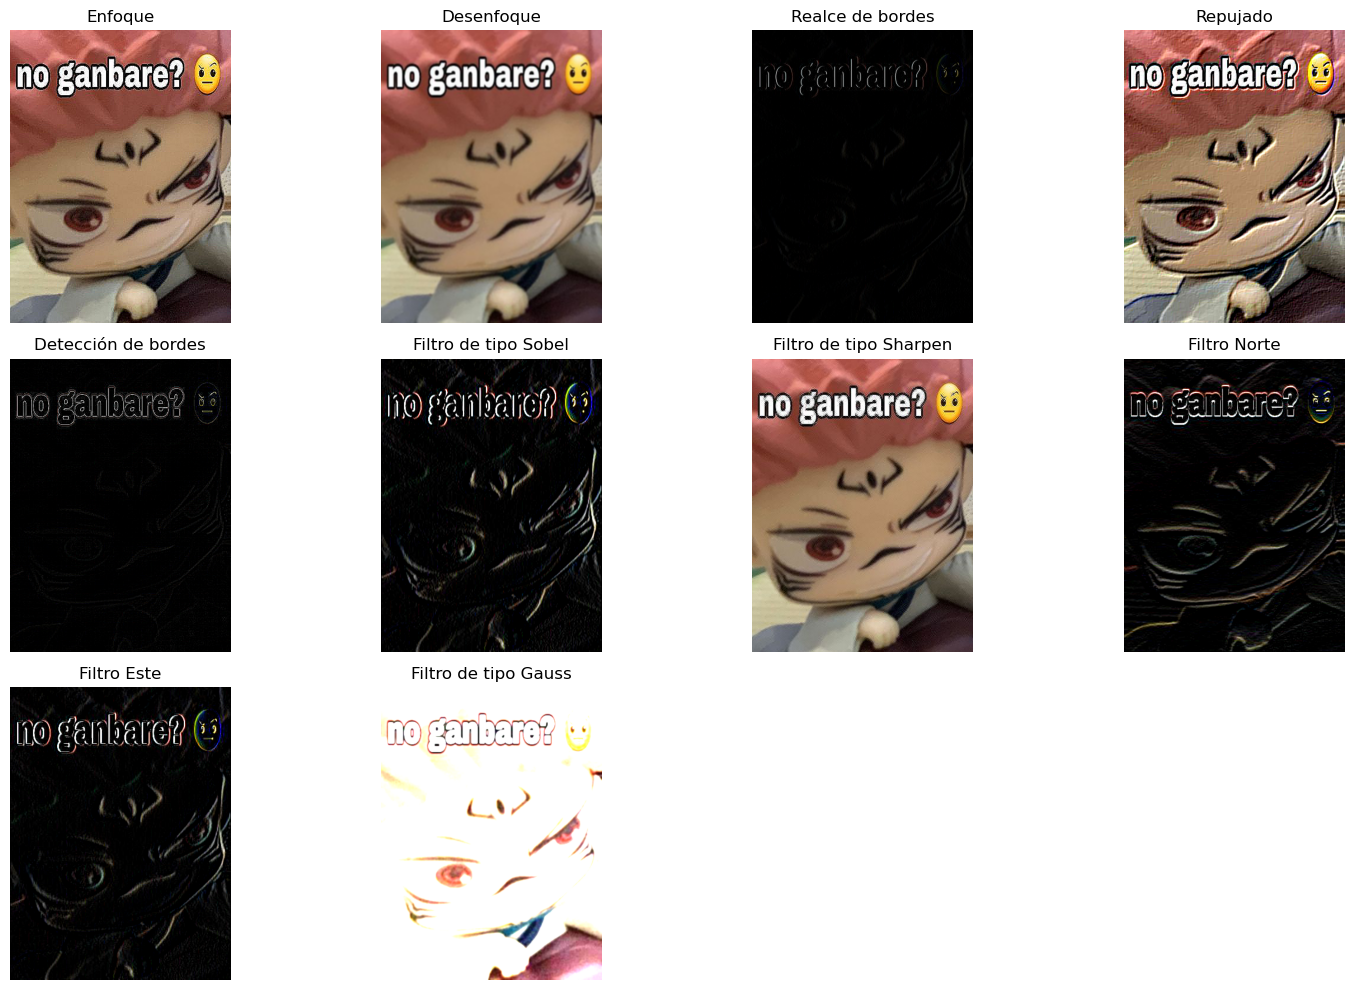

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

kernels = {
    "Enfoque": np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),

    "Desenfoque": np.ones((5, 5), dtype=np.float32) / 25,

    "Realce de bordes": np.array([[0,0,0],
                                  [-1,  1, 0],
                                  [0,0,0]]),

    "Repujado": np.array([[ -2, -1, 0],
                          [ -1,  1, 1],
                          [ 0,  1, 2]]),
                          

    "Detección de bordes": np.array([[0,1,0],
                                     [1,  -4, 1],
                                     [0,1,0]]),

    "Filtro de tipo Sobel": np.array([[-1, 0, 1],
                                      [-2, 0, 2],
                                      [-1, 0, 1]]),

    "Filtro de tipo Sharpen": np.array([[ 1, -2,  1],
                                        [-2,  5, -2],
                                        [ 1, -2,  1]]),

    "Filtro Norte": np.array([[ 1,  1,  1],
                              [ 1, -2,  1],
                              [-1, -1, -1]]),

    "Filtro Este": np.array([[-1,  1,  1],
                             [-1, -2,  1],
                             [-1,  1,  1]]),

    "Filtro de tipo Gauss": np.array([[1, 2, 3,1,1],
                                      [2, 7, 11,7,2],
                                      [3,11, 17,11,3],
                                      [2,7,11,7,1],
                                      [1,2,3,2,1]], dtype=np.float32) / 25

                            
}

def aplicar_filtros_color(imagen_color):
    resultados = {}
    for nombre, kernel in kernels.items():
        canales = cv2.split(imagen_color)
        canales_filtrados = [cv2.filter2D(c, -1, kernel) for c in canales]
        img_filtrada = cv2.merge(canales_filtrados)
        resultados[nombre] = img_filtrada
    return resultados

imagen_color = cv2.imread("2.jpg")


imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

resultados = aplicar_filtros_color(imagen_rgb)

plt.figure(figsize=(15, 10))
for i, (nombre, img) in enumerate(resultados.items()):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(nombre)
    plt.axis('off')
plt.tight_layout()
plt.show()
